# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [28]:
%matplotlib inline
# import numpy and pandas
import numpy as np 
import pandas as pd


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [29]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [30]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [67]:
# Your code here:

# Función para quitar caracteres diferente a numericos del valor y expresar miles en millones
def transform_value(x):
    x =  x.replace('€', '')
    if 'M'in x:
        return float(x.replace('M', ''))
    elif 'K' in x:
        return 0.001*float(x.replace('K', ''))

fifa['ValueNumeric'] = fifa['Value'].apply(lambda x: transform_value(x))


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [75]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("ValueNumeric ~ C(fifa['Preferred Foot']) * C(Position)",fifa).fit()
anova = sm.stats.anova_lm(model, typ = 2)
anova

,sum_sq,df,F,PR(>F)
C(fifa['Preferred Foot']),231.646105,1.0,7.570476,5.939195e-03
C(Position),16596.095506,26.0,20.860790,2.309558e-96
C(fifa['Preferred Foot']):C(Position),5182.139505,26.0,6.513793,7.422724e-23
Residual,546277.142441,17853.0,NaN,NaN


What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:
"""Ambas variables tanto como su interacción son estadisticamente significativas sobre la variable value"""


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [76]:
# Your code here:
model = ols("ValueNumeric ~ C(Nationality)",fifa).fit()
anova = sm.stats.anova_lm(model, typ = 2)
anova


,sum_sq,df,F,PR(>F)
C(Nationality),32816.950752,162.0,6.713684,8.383689e-132
Residual,535394.461682,17744.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
"""La variable de Nacionalidad es estadisticamente significativa para la variable value"""

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [70]:
# Your code here:
fifa.isna().sum()/fifa.shape[0]*100

Name              0.0
Age               0.0
Nationality       0.0
Overall           0.0
Potential         0.0
Club              0.0
Value             0.0
Preferred Foot    0.0
Position          0.0
Weak Foot         0.0
Acceleration      0.0
SprintSpeed       0.0
Stamina           0.0
Strength          0.0
LongShots         0.0
Aggression        0.0
Interceptions     0.0
Positioning       0.0
Vision            0.0
Penalties         0.0
ValueNumeric      0.0
dtype: float64

In [61]:
# Observamos del codigo anterior que exist un porcentahe pequeño de valores nulos
fifa.dropna(inplace=True)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [62]:
# Your code here:
import statsmodels.api as sm

# Variable dependiente
Y = fifa['ValueNumeric']

# Variables explicativas
X = fifa[['Stamina', 'SprintSpeed']]

# Agregar una constante al modelo
X = sm.add_constant(X)

model = sm.OLS(Y,X)

#Entrenear el modelo
results = model.fit()

# Parametros de salida
results.params

const         -3.072232
Stamina        0.060389
SprintSpeed    0.026326
dtype: float64

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     452.2
Date:                Wed, 11 Nov 2020   Prob (F-statistic):          2.64e-192
Time:                        17:33:39   Log-Likelihood:                -55923.
No. Observations:               17907   AIC:                         1.119e+05
Df Residuals:                   17904   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0722      0.197    -15.576      0.000      -3.459      -2.686
Stamina         0.0604      0.003     18.346      0.000       0.054       0.067
SprintSpeed     0.0263      0.004      7.376      0.000       0.019       0.033
==============================================================================
Omnibus:                    22822.402   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4639541.011
Skew:                           7.039   Prob(JB):                         0.00
Kurtosis:                      80.588   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [42]:
# Your conclusions here:
"""Prob (F-statistic) (2.64e-192) < (0.1, 0.05, 0.01), lo que a un 90%,95% y 99% de confianza, 
las variables del modelo, en general, son significativas.

Por otro lado, el r cuadrado = 0.048, lo que significa que nuestro modelo no explica lo suficiente
a la variable dependiente """



Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [64]:
# Your code here:

# Variables explicativas
X = fifa['Potential']

# Agregar una constante al modelo
X = sm.add_constant(X)

model2 = sm.OLS(Y,X)

#Entrenear el modelo
results2 = model2.fit()

# Parametros de salida
results2.params


const       -35.521200
Potential     0.532294
dtype: float64

In [65]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9073.
Date:                Wed, 11 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:34:49   Log-Likelihood:                -52693.
No. Observations:               17907   AIC:                         1.054e+05
Df Residuals:                   17905   BIC:                         1.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.5212      0.400    -88.778      0.000     -36.305     -34.737
Potential      0.5323      0.006     95.252      0.000       0.521       0.543
==============================================================================
Omnibus:                    23011.631   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6334620.314
Skew:                           7.010   Prob(JB):                         0.00
Kurtosis:                      94.068   Cond. No.                         835.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:
"""Prob (F-statistic) (0.00) < (0.1, 0.05, 0.01), lo que a un 90%,95% y 99% de confianza, 
las variables del modelo, en general, son significativas.
Por otro lado, el r cuadrado = 0.336, lo que significa que nuestro modelo no explica lo suficiente
a la variable dependiente sin embargo es mayor que el primer modelo"""


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

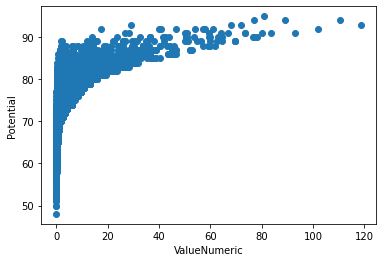

In [66]:
# Your code here:
import matplotlib.pyplot as plt

plt.scatter('ValueNumeric', 'Potential', data = fifa)
plt.xlabel('ValueNumeric')
plt.ylabel('Potential');

In [ ]:
"""Se observa que para valores muy pequeños de ValueNumeric hay una aglomeración sin embargo después se observa una ligera
tendencia lineal"""